In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

# Importing of data

In [2]:
raw_data = pd.read_csv('fraud_oracle.csv')
raw_data.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [4]:
raw_data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [5]:
raw_data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


# Remove Outliers

In [6]:
# Remove Outlier for age is there is entries for Age = 0

raw_data = raw_data[raw_data['Age'] != 0]
raw_data.reset_index(inplace=True)
raw_data.drop("index", axis=1, inplace=True)

In [7]:
raw_data['FraudFound_P'].value_counts()

0    14208
1      892
Name: FraudFound_P, dtype: int64

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15100 non-null  object
 1   WeekOfMonth           15100 non-null  int64 
 2   DayOfWeek             15100 non-null  object
 3   Make                  15100 non-null  object
 4   AccidentArea          15100 non-null  object
 5   DayOfWeekClaimed      15100 non-null  object
 6   MonthClaimed          15100 non-null  object
 7   WeekOfMonthClaimed    15100 non-null  int64 
 8   Sex                   15100 non-null  object
 9   MaritalStatus         15100 non-null  object
 10  Age                   15100 non-null  int64 
 11  Fault                 15100 non-null  object
 12  PolicyType            15100 non-null  object
 13  VehicleCategory       15100 non-null  object
 14  VehiclePrice          15100 non-null  object
 15  FraudFound_P          15100 non-null

# Feature selection using f_classif and mutual_info_classif

In [9]:
raw_data['RepNumber'] = raw_data['RepNumber'].astype(str)
raw_data['WeekOfMonth'] = raw_data['WeekOfMonth'].astype(str)
raw_data['WeekOfMonthClaimed'] = raw_data['WeekOfMonthClaimed'].astype(str)

In [10]:
def split_columns_temp(df):
    cat_lst = []
    num_lst = []
    for name in df.columns:
        if name in ["FraudFound_P", "PolicyNumber","Days_Policy_Accident","PolicyType"]:
            continue
        if df[name].dtype != 'object':
            num_lst.append(name)
        else:
            cat_lst.append(name)

    return cat_lst, num_lst

In [11]:
categorical_lst, num_lst = split_columns_temp(raw_data)
print("Categorical Variables: ",categorical_lst)
print("Numerical Variables:",num_lst)

Categorical Variables:  ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'VehicleCategory', 'VehiclePrice', 'RepNumber', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']
Numerical Variables: ['Age', 'Deductible', 'DriverRating', 'Year']


In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

X, y = raw_data[num_lst], raw_data['FraudFound_P']

# Take top 50% for each classifier
proportion = 0.5
k = int(len(num_lst) * proportion)

# Populate features list
numerical_features = []
mutual_info = lambda x,y: mutual_info_classif(x, y, random_state=0)
mutual_info.__name__ = "mutual_info_classif"

for classif in [f_classif, mutual_info]:
    selector = SelectKBest(classif, k=k)
    selector.fit_transform(X, y)
    mask = selector.get_support()
    new_features = list(X.columns[mask])
    print(classif.__name__, new_features)
    numerical_features.extend(new_features)

# Retain unique elements
numerical_features = list(set(numerical_features))
numerical_features

f_classif ['Age', 'Deductible']
mutual_info_classif ['Age', 'Deductible']


['Age', 'Deductible']

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

# Encode categorical variables
label_encoder = LabelEncoder()
df = raw_data.copy()
X, y = df[categorical_lst], df['FraudFound_P']
for var in categorical_lst:
    X[var] = label_encoder.fit_transform(raw_data[var])

# We take top 50% for each classifier
proportion = 0.5
k = int(len(categorical_lst) * proportion)

# Populate features list
categorical_features = []
mutual_info = lambda x,y: mutual_info_classif(x, y, random_state=0)
mutual_info.__name__ = "mutual_info_classif"

for classif in [chi2, mutual_info]:
    selector = SelectKBest(classif, k=k)
    selector.fit_transform(X, y)
    mask = selector.get_support()
    new_features = list(X.columns[mask])
    print(classif.__name__, new_features)
    categorical_features.extend(new_features)

# Retain unique elements
categorical_features = list(set(categorical_features))
categorical_features

chi2 ['DayOfWeek', 'Make', 'MonthClaimed', 'Fault', 'VehicleCategory', 'VehiclePrice', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'AgentType', 'BasePolicy']


C:\Users\hein_\AppData\Local\Temp\ipykernel_12012\3487875446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[var] = label_encoder.fit_transform(raw_data[var])
C:\Users\hein_\AppData\Local\Temp\ipykernel_12012\3487875446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[var] = label_encoder.fit_transform(raw_data[var])
C:\Users\hein_\AppData\Local\Temp\ipykernel_12012\3487875446.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

mutual_info_classif ['DayOfWeek', 'AccidentArea', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'Fault', 'VehicleCategory', 'Days_Policy_Claim', 'PastNumberOfClaims', 'NumberOfSuppliments', 'AddressChange_Claim', 'BasePolicy']


['Sex',
 'AddressChange_Claim',
 'Make',
 'AgentType',
 'WeekOfMonthClaimed',
 'Fault',
 'MonthClaimed',
 'PoliceReportFiled',
 'NumberOfSuppliments',
 'VehicleCategory',
 'BasePolicy',
 'DayOfWeek',
 'PastNumberOfClaims',
 'Days_Policy_Claim',
 'AgeOfVehicle',
 'VehiclePrice',
 'AgeOfPolicyHolder',
 'AccidentArea']

In [14]:
final_features = []

In [15]:
final_features.extend(numerical_features)
final_features.extend(categorical_features)
final_features.append('FraudFound_P')

In [16]:
final_features

['Age',
 'Deductible',
 'Sex',
 'AddressChange_Claim',
 'Make',
 'AgentType',
 'WeekOfMonthClaimed',
 'Fault',
 'MonthClaimed',
 'PoliceReportFiled',
 'NumberOfSuppliments',
 'VehicleCategory',
 'BasePolicy',
 'DayOfWeek',
 'PastNumberOfClaims',
 'Days_Policy_Claim',
 'AgeOfVehicle',
 'VehiclePrice',
 'AgeOfPolicyHolder',
 'AccidentArea',
 'FraudFound_P']

# After looking at the data, we have narrowed down to the following features to be included in our final dataframe.

In [17]:
final_df = raw_data[final_features].copy()

In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  15100 non-null  int64 
 1   Deductible           15100 non-null  int64 
 2   Sex                  15100 non-null  object
 3   AddressChange_Claim  15100 non-null  object
 4   Make                 15100 non-null  object
 5   AgentType            15100 non-null  object
 6   WeekOfMonthClaimed   15100 non-null  object
 7   Fault                15100 non-null  object
 8   MonthClaimed         15100 non-null  object
 9   PoliceReportFiled    15100 non-null  object
 10  NumberOfSuppliments  15100 non-null  object
 11  VehicleCategory      15100 non-null  object
 12  BasePolicy           15100 non-null  object
 13  DayOfWeek            15100 non-null  object
 14  PastNumberOfClaims   15100 non-null  object
 15  Days_Policy_Claim    15100 non-null  object
 16  AgeO

### Binary Categorical Variables

In [19]:
for column in categorical_features:
    if len(final_df[column].unique()) == 2:
        print(column, final_df[column].unique())
        print()

Sex ['Female' 'Male']

AgentType ['External' 'Internal']

Fault ['Policy Holder' 'Third Party']

PoliceReportFiled ['No' 'Yes']

AccidentArea ['Urban' 'Rural']



### Multi-categorical Variables

In [20]:
for column in categorical_features:
    if len(final_df[column].unique()) > 2:
        print(column, final_df[column].unique())
        print()

AddressChange_Claim ['1 year' 'no change' '4 to 8 years' '2 to 3 years' 'under 6 months']

Make ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']

WeekOfMonthClaimed ['1' '4' '2' '3' '5']

MonthClaimed ['Jan' 'Nov' 'Jul' 'Feb' 'Dec' 'Apr' 'Mar' 'Aug' 'May' 'Jun' 'Sep' 'Oct']

NumberOfSuppliments ['none' 'more than 5' '3 to 5' '1 to 2']

VehicleCategory ['Sport' 'Utility' 'Sedan']

BasePolicy ['Liability' 'Collision' 'All Perils']

DayOfWeek ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

PastNumberOfClaims ['none' '1' '2 to 4' 'more than 4']

Days_Policy_Claim ['more than 30' '15 to 30' '8 to 15']

AgeOfVehicle ['3 years' '6 years' '7 years' 'more than 7' '5 years' '4 years' '2 years'
 'new']

VehiclePrice ['more than 69000' '20000 to 29000' '30000 to 39000' 'less than 20000'
 '40000 to 59000' '60000 to 69000']

AgeOfPolicyHolder ['26 to 30' '31

## Ordinal Features
1) AgeOfPolicyHolder
2) PastNumberOfClaims
3) VehiclePrice
4) NumberOfSuppliments
5) Days_Policy_Claim

In [21]:
ordinal_features = ['AgeOfPolicyHolder','PastNumberOfClaims',
                    'VehiclePrice','NumberOfSuppliments','Days_Policy_Claim']

# Feature Engineering and Preprocessing

In [22]:
def split_columns_by_Dtypes(df):
    binary_lst = []
    categorical_lst = []
    num_lst = []
    for name in df.columns:
        length = len(df[name].unique())
        if df[name].dtype != 'object':
            num_lst.append(name)
        elif length == 2:
            binary_lst.append(name)
        else:
            categorical_lst.append(name)
    return binary_lst, categorical_lst, num_lst

In [23]:
def convert_label(df, columns):
    for name in columns:
        encoder = LabelEncoder()
        df[name] = encoder.fit_transform(df[name])
    return df

In [24]:
def oneHotEncode(df, lst):
    ohe = OneHotEncoder()
    output_array = ohe.fit_transform(df[lst]).toarray()
    df[ohe.get_feature_names_out()] = output_array
    return df

In [25]:
def scaler(df,columns):
    age = []
    deductible = []
    scaler = MinMaxScaler()
    output = scaler.fit_transform(df[columns])
    for row in output:
        age.append(row[0])
        deductible.append(row[1])
    df['Age'] = age
    df['Deductible'] = deductible
    return df

In [26]:
def convert_ordinal(df, name, mapping):
    encoder = LabelEncoder()
    encoder.classes_ = [str(category) for category, _ in sorted(mapping.items(), key=lambda x: x[1])]
    df[name] = encoder.fit_transform(df[name])
    return df

In [27]:
def count_encoder(df, columns):
    for name in columns:
        encoder = ce.CountEncoder(cols=name, normalize=True)
        df[name] = encoder.fit_transform(df[name])
    return df

In [28]:
binary_lst, categorical_lst, num_lst = split_columns_by_Dtypes(final_df)

In [29]:
multicat_features = [feature for feature in categorical_lst if feature not in ordinal_features]
multicat_features.remove('MonthClaimed')
multicat_features.remove('Make')

print("Binary Variable:",binary_lst)
print("Multi-Categorical Variable:",multicat_features)
print("Numerical:",num_lst)
print("Ordinal:", ordinal_features)
print("CountEncoder", ['Make','MonthClaimed'])

Binary Variable: ['Sex', 'AgentType', 'Fault', 'PoliceReportFiled', 'AccidentArea']
Multi-Categorical Variable: ['AddressChange_Claim', 'WeekOfMonthClaimed', 'VehicleCategory', 'BasePolicy', 'DayOfWeek', 'AgeOfVehicle']
Numerical: ['Age', 'Deductible', 'FraudFound_P']
Ordinal: ['AgeOfPolicyHolder', 'PastNumberOfClaims', 'VehiclePrice', 'NumberOfSuppliments', 'Days_Policy_Claim']
CountEncoder ['Make', 'MonthClaimed']


# Encoding all the categorical variables using helper functions

## Label Encoding for Binary Features

In [30]:
convert_label(final_df, binary_lst)

,Age,Deductible,Sex,AddressChange_Claim,Make,AgentType,WeekOfMonthClaimed,Fault,MonthClaimed,PoliceReportFiled,...,VehicleCategory,BasePolicy,DayOfWeek,PastNumberOfClaims,Days_Policy_Claim,AgeOfVehicle,VehiclePrice,AgeOfPolicyHolder,AccidentArea,FraudFound_P
0,21,300,0,1 year,Honda,0,1,0,Jan,0,...,Sport,Liability,Wednesday,none,more than 30,3 years,more than 69000,26 to 30,1,0
1,34,400,1,no change,Honda,0,4,0,Jan,1,...,Sport,Collision,Wednesday,none,more than 30,6 years,more than 69000,31 to 35,1,0
2,47,400,1,no change,Honda,0,2,0,Nov,0,...,Sport,Collision,Friday,1,more than 30,7 years,more than 69000,41 to 50,1,0
3,65,400,1,no change,Toyota,0,1,1,Jul,1,...,Sport,Liability,Saturday,1,more than 30,more than 7,20000 to 29000,51 to 65,0,0
4,27,400,0,no change,Honda,0,2,1,Feb,0,...,Sport,Collision,Monday,none,more than 30,5 years,more than 69000,31 to 35,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,35,400,1,no change,Toyota,0,5,0,Nov,0,...,Sedan,Collision,Friday,2 to 4,more than 30,6 years,20000 to 29000,31 to 35,1,1
15096,30,400,1,no change,Pontiac,0,1,0,Dec,0,...,Sport,Liability,Thursday,more than 4,more than 30,6 years,30000 to 39000,31 to 35,1,0
15097,24,400,1,no change,Toyota,0,1,0,Dec,0,...,Sedan,Collision,Thursday,more than 4,more than 30,5 years,20000 to 29000,26 to 30,0,1
15098,34,400,0,no change,Toyota,0,2,1,Dec,0,...,Sedan,All Perils,Monday,none,more than 30,2 years,20000 to 29000,31 to 35,1,0


## One Hot Encoding

In [31]:
oneHotEncode(final_df,multicat_features)

,Age,Deductible,Sex,AddressChange_Claim,Make,AgentType,WeekOfMonthClaimed,Fault,MonthClaimed,PoliceReportFiled,...,DayOfWeek_Tuesday,DayOfWeek_Wednesday,AgeOfVehicle_2 years,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new
0,21,300,0,1 year,Honda,0,1,0,Jan,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34,400,1,no change,Honda,0,4,0,Jan,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,47,400,1,no change,Honda,0,2,0,Nov,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,65,400,1,no change,Toyota,0,1,1,Jul,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,27,400,0,no change,Honda,0,2,1,Feb,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,35,400,1,no change,Toyota,0,5,0,Nov,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15096,30,400,1,no change,Pontiac,0,1,0,Dec,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15097,24,400,1,no change,Toyota,0,1,0,Dec,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15098,34,400,0,no change,Toyota,0,2,1,Dec,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Scaling of Numberical Features

In [32]:
# We do not want to scale the label
scaler(final_df, ['Age','Deductible'])

,Age,Deductible,Sex,AddressChange_Claim,Make,AgentType,WeekOfMonthClaimed,Fault,MonthClaimed,PoliceReportFiled,...,DayOfWeek_Tuesday,DayOfWeek_Wednesday,AgeOfVehicle_2 years,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new
0,0.078125,0.00,0,1 year,Honda,0,1,0,Jan,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.281250,0.25,1,no change,Honda,0,4,0,Jan,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.484375,0.25,1,no change,Honda,0,2,0,Nov,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.765625,0.25,1,no change,Toyota,0,1,1,Jul,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.171875,0.25,0,no change,Honda,0,2,1,Feb,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,0.296875,0.25,1,no change,Toyota,0,5,0,Nov,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15096,0.218750,0.25,1,no change,Pontiac,0,1,0,Dec,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15097,0.125000,0.25,1,no change,Toyota,0,1,0,Dec,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15098,0.281250,0.25,0,no change,Toyota,0,2,1,Dec,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Label Encoding for Ordinal Features

In [33]:
ordinal_features

['AgeOfPolicyHolder',
 'PastNumberOfClaims',
 'VehiclePrice',
 'NumberOfSuppliments',
 'Days_Policy_Claim']

In [34]:
age_policy_holder_mapping = {'26 to 30': 2, '31 to 35':3, '41 to 50': 5, '51 to 65': 6, '21 to 25': 1, '36 to 40':4, 'over 65': 7, '18 to 20': 0}
past_number_of_claims_mapping = {'none': 0, '1': 1, '2 to 4': 2, 'more than 4': 3}
vehicle_price_mapping = {'more than 69000': 5, '20000 to 29000': 1, '30000 to 39000': 2, 'less than 20000': 0, '40000 to 59000': 3, '60000 to 69000': 4}
NoS_mapping = {'none':0, '1 to 2':1, '3 to 5':2, 'more than 5':3}
DPC_mapping = {'none':0, '8 to 15':1, '15 to 30':2, 'more than 30':3}

mapper_lst = [age_policy_holder_mapping, past_number_of_claims_mapping, vehicle_price_mapping, NoS_mapping,DPC_mapping]

mapper_lst

[{'26 to 30': 2,
  '31 to 35': 3,
  '41 to 50': 5,
  '51 to 65': 6,
  '21 to 25': 1,
  '36 to 40': 4,
  'over 65': 7,
  '18 to 20': 0},
 {'none': 0, '1': 1, '2 to 4': 2, 'more than 4': 3},
 {'more than 69000': 5,
  '20000 to 29000': 1,
  '30000 to 39000': 2,
  'less than 20000': 0,
  '40000 to 59000': 3,
  '60000 to 69000': 4},
 {'none': 0, '1 to 2': 1, '3 to 5': 2, 'more than 5': 3},
 {'none': 0, '8 to 15': 1, '15 to 30': 2, 'more than 30': 3}]

In [35]:
for i in range(0,5):
    convert_ordinal(final_df, ordinal_features[i], mapper_lst[i]);

## Frequency Encoding for Categorical Variables with more than 10 categories

In [36]:
count_encoder(final_df, ['Make','MonthClaimed'])

,Age,Deductible,Sex,AddressChange_Claim,Make,AgentType,WeekOfMonthClaimed,Fault,MonthClaimed,PoliceReportFiled,...,DayOfWeek_Tuesday,DayOfWeek_Wednesday,AgeOfVehicle_2 years,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new
0,0.078125,0.00,0,1 year,0.164371,0,1,0,0.091060,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.281250,0.25,1,no change,0.164371,0,4,0,0.091060,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.484375,0.25,1,no change,0.164371,0,2,0,0.084503,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.765625,0.25,1,no change,0.206689,0,1,1,0.080530,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.171875,0.25,0,no change,0.164371,0,2,1,0.082119,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,0.296875,0.25,1,no change,0.206689,0,5,0,0.084503,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15096,0.218750,0.25,1,no change,0.254106,0,1,0,0.075430,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15097,0.125000,0.25,1,no change,0.206689,0,1,0,0.075430,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15098,0.281250,0.25,0,no change,0.206689,0,2,1,0.075430,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 15100 non-null  float64
 1   Deductible                          15100 non-null  float64
 2   Sex                                 15100 non-null  int32  
 3   AddressChange_Claim                 15100 non-null  object 
 4   Make                                15100 non-null  float64
 5   AgentType                           15100 non-null  int32  
 6   WeekOfMonthClaimed                  15100 non-null  object 
 7   Fault                               15100 non-null  int32  
 8   MonthClaimed                        15100 non-null  float64
 9   PoliceReportFiled                   15100 non-null  int32  
 10  NumberOfSuppliments                 15100 non-null  int32  
 11  VehicleCategory                     15100

In [38]:
final_df.head()

,Age,Deductible,Sex,AddressChange_Claim,Make,AgentType,WeekOfMonthClaimed,Fault,MonthClaimed,PoliceReportFiled,...,DayOfWeek_Tuesday,DayOfWeek_Wednesday,AgeOfVehicle_2 years,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new
0,0.078125,0.00,0,1 year,0.164371,0,1,0,0.091060,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.281250,0.25,1,no change,0.164371,0,4,0,0.091060,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.484375,0.25,1,no change,0.164371,0,2,0,0.084503,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.765625,0.25,1,no change,0.206689,0,1,1,0.080530,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.171875,0.25,0,no change,0.164371,0,2,1,0.082119,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Clean up the dataset to remove unnecessary columns

In [39]:
final_df.drop(multicat_features, axis=1, inplace=True)

In [40]:
final_df.reset_index(inplace = True)
final_df.drop('index', axis=1, inplace=True)

In [41]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15100 entries, 0 to 15099
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 15100 non-null  float64
 1   Deductible                          15100 non-null  float64
 2   Sex                                 15100 non-null  int32  
 3   Make                                15100 non-null  float64
 4   AgentType                           15100 non-null  int32  
 5   Fault                               15100 non-null  int32  
 6   MonthClaimed                        15100 non-null  float64
 7   PoliceReportFiled                   15100 non-null  int32  
 8   NumberOfSuppliments                 15100 non-null  int32  
 9   PastNumberOfClaims                  15100 non-null  int32  
 10  Days_Policy_Claim                   15100 non-null  int32  
 11  VehiclePrice                        15100

In [42]:
final_df.head()

,Age,Deductible,Sex,Make,AgentType,Fault,MonthClaimed,PoliceReportFiled,NumberOfSuppliments,PastNumberOfClaims,...,DayOfWeek_Tuesday,DayOfWeek_Wednesday,AgeOfVehicle_2 years,AgeOfVehicle_3 years,AgeOfVehicle_4 years,AgeOfVehicle_5 years,AgeOfVehicle_6 years,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new
0,0.078125,0.00,0,0.164371,0,0,0.091060,0,3,3,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.281250,0.25,1,0.164371,0,0,0.091060,1,3,3,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.484375,0.25,1,0.164371,0,0,0.084503,0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.765625,0.25,1,0.206689,0,1,0.080530,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.171875,0.25,0,0.164371,0,1,0.082119,0,3,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Train Test split

In [43]:
x_var = [i for i in list(final_df.columns) if i != 'FraudFound_P']
y_var = ['FraudFound_P']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X, X_test, y, y_test = train_test_split(final_df[x_var], final_df[y_var],
                                        test_size=0.1, random_state=19,
                                        stratify=final_df[y_var])

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=19, stratify=y)

In [47]:
X_train.shape

(10872, 45)

In [48]:
X_val.shape

(2718, 45)

In [49]:
X_test.shape

(1510, 45)

In [50]:
y_train['FraudFound_P'].sum()

642

# Machine Learning Model Training

In [183]:
# for data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from copy import deepcopy

# machine learning models
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# for evaluation of machine learning models
from sklearn.metrics import accuracy_score, recall_score, fbeta_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.metrics import geometric_mean_score

import warnings
warnings.filterwarnings('ignore')

In [52]:
def evaluate_results(y_test, y_pred):
    '''
    This is a helper function that we will call to print basic results statistics.
    '''
    # Create confusion matrix of validation data
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    print("Confusion Matrix: \n", cm)
    print("TN: %s, FP: %s, FN: %s, TP: %s" %(TN, FP, FN, TP))
    print("\n")

    # Evaluation Statistics
    # Performance of decision tree model on validation data
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F2: ", fbeta_score(y_test, y_pred, beta=2))
    print("G-Mean: ", geometric_mean_score(y_test, y_pred))

In [53]:
def train_model(X_train, X_test, y_train, y_test, classifier):

    # build model on train set
    C = classifier
    C.fit(X_train, y_train)

    # predict on validation set
    y_preds = C.predict(X_test)

    # Evaluate results
    evaluate_results(y_test, y_preds)

# Training model without handling imbalance data

## Logistic Regression

In [54]:
LR = LogisticRegression(random_state=19)

In [55]:
train_model(X_train, X_val, y_train, y_val, LR)

Confusion Matrix: 
 [[2554    3]
 [ 161    0]]
TN: 2554, FP: 3, FN: 161, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0


## Linear SVC

In [56]:
svc = LinearSVC(random_state=19)

In [57]:
train_model(X_train, X_val, y_train, y_val, svc)

Confusion Matrix: 
 [[2556    1]
 [ 160    1]]
TN: 2556, FP: 1, FN: 160, TP: 1


Precision:  0.5
Recall:  0.006211180124223602
F2:  0.007739938080495355
G-Mean:  0.07879562827593363


## XBG Classifier

In [58]:
xgb = XGBClassifier(random_state=19)

In [59]:
train_model(X_train, X_val, y_train, y_val, xgb)

Confusion Matrix: 
 [[2541   16]
 [ 147   14]]
TN: 2541, FP: 16, FN: 147, TP: 14


Precision:  0.4666666666666667
Recall:  0.08695652173913043
F2:  0.10385756676557864
G-Mean:  0.29395987114306005


## Random Forest

In [145]:
rf = RandomForestClassifier(random_state=19)

In [146]:
train_model(X_train, X_val, y_train, y_val, rf)

Confusion Matrix: 
 [[2554    3]
 [ 155    6]]
TN: 2554, FP: 3, FN: 155, TP: 6


Precision:  0.6666666666666666
Recall:  0.037267080745341616
F2:  0.04594180704441042
G-Mean:  0.19293355629983286


## AdaBoost

In [184]:
adb = AdaBoostClassifier(random_state=19)

In [185]:
train_model(X_train, X_val, y_train, y_val, adb)

Confusion Matrix: 
 [[2536   21]
 [ 159    2]]
TN: 2536, FP: 21, FN: 159, TP: 2


Precision:  0.08695652173913043
Recall:  0.012422360248447204
F2:  0.014992503748125937
G-Mean:  0.11099702031054069


## Voting Classifier

In [186]:
vc = VotingClassifier(
    estimators=[('XGB',xgb),('LR',LR), ('SVC', svc), ('RF', rf), ('Ada', adb)],
    voting='hard'
)

In [187]:
train_model(X_train, X_val, y_train, y_val, vc)

Confusion Matrix: 
 [[2557    0]
 [ 161    0]]
TN: 2557, FP: 0, FN: 161, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0


In [188]:
vc = VotingClassifier(
    estimators=[('XGB',xgb), ('RF', rf), ('Ada', adb)],
    voting='hard'
)

In [189]:
train_model(X_train, X_val, y_train, y_val, vc)

Confusion Matrix: 
 [[2557    0]
 [ 155    6]]
TN: 2557, FP: 0, FN: 155, TP: 6


Precision:  1.0
Recall:  0.037267080745341616
F2:  0.046153846153846156
G-Mean:  0.19304683562633604


# Imbalance Data Handling

In [62]:
# imblean provides tools for us to deal with imbalanced class sizes
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

In [63]:
def get_sample_SMOTE(X_train, y_train, sampling):
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    X_res_smote, y_res_smote = smote_only.fit_resample(X_train, y_train)
    return X_res_smote, y_res_smote

In [64]:
def get_sample_SMOTEENN(X_train, y_train, neighbour, sampling):
    ennObj = EditedNearestNeighbours(n_neighbors=neighbour)
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
    X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)
    return X_res_smoteENN, y_res_smoteENN

In [65]:
def train_data_with_SMOTE_val(X_train, X_val, y_train, y_val, sampling, classifier):

    X_test = X_val
    y_test = y_val

    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    X_res_smote, y_res_smote = smote_only.fit_resample(X_train, y_train)

    clf = classifier
    clf.fit(X_res_smote, y_res_smote)

    # predict on validation set
    y_preds = clf.predict(X_test)


    # Evaluate results
    evaluate_results(y_test, y_preds)
    Precision = precision_score(y_test, y_preds)
    F2 = fbeta_score(y_test, y_preds, beta=2)
    Recall = recall_score(y_test, y_preds)
    Gmean = geometric_mean_score(y_test, y_preds)
    return Precision, Recall, F2, Gmean

In [66]:
def train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val, neighbour, sampling, classifier):

    ennObj = EditedNearestNeighbours(n_neighbors=neighbour)
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
    X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)

    clf = classifier
    clf.fit(X_res_smoteENN, y_res_smoteENN)

    # predict on validation set
    y_preds = clf.predict(X_val)

    # Evaluate results
    evaluate_results(y_val, y_preds)
    Precision = precision_score(y_val, y_preds)
    F2 = fbeta_score(y_val, y_preds, beta=2)
    Recall = recall_score(y_val, y_preds)
    Gmean = geometric_mean_score(y_val, y_preds)
    return Precision, Recall, F2, Gmean

In [67]:
def train_data_with_weights_val(X_train, X_val, y_train, y_val, classifier):

    X_test = X_val
    y_test = y_val

    clf = classifier
    clf.fit(X_train, y_train)

    # predict on validation set
    y_preds = clf.predict(X_test)

    # Evaluate results
    evaluate_results(y_test, y_preds)
    Precision = precision_score(y_test, y_preds)
    F2 = fbeta_score(y_test, y_preds, beta=2)
    Recall = recall_score(y_test, y_preds)
    Gmean = geometric_mean_score(y_test, y_preds)
    return Precision, Recall, F2, Gmean

In [68]:
def get_performance_visualisation(method, X_train, X_val, y_train, y_val, classifier, neighbour=5):
    Precision_lst, F2_lst, Recall_lst, resampling, Gmean_lst = [], [], [], [], []
    if method == "SMOTEENN":
        resampling = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
        for sampling in resampling:
            print("Sampling Size:", sampling)
            print()
            Precision, Recall, F2, Gmean = train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val, neighbour, sampling, classifier)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
        df = pd.DataFrame(columns=['Precision','F2 Score','Recall', 'G-mean'])
        df['Precision'] = Precision_lst
        df['F2 Score'] = F2_lst
        df['Recall'] = Recall_lst
        df['G-mean'] = Gmean_lst
        df['Sampling Size'] = resampling
        df.plot(x='Sampling Size',
            y=['Precision','F2 Score','Recall', 'G-mean'],
            title= 'Resampling Performance',
               ylim=(0,1))

    elif method == "SMOTE":
        resampling = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
        for sampling in resampling:
            print("Sampling Size:", sampling)
            print()
            Precision, Recall, F2, Gmean = train_data_with_SMOTE_val(X_train, X_val, y_train, y_val, sampling, classifier)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
        df = pd.DataFrame(columns=['Precision','F2 Score','Recall','G-mean'])
        df['Precision'] = Precision_lst
        df['F2 Score'] = F2_lst
        df['Recall'] = Recall_lst
        df['G-mean'] = Gmean_lst
        df['Sampling Size'] = resampling
        df.plot(x='Sampling Size',
            y=['Precision','F2 Score','Recall','G-mean'],
            title= 'Resampling Performance',
               ylim=(0,1))
    df.to_csv(f'{classifier.__module__}_{method}.csv')
    return df

In [69]:
def get_performance_weighing(method, X_train, X_val, y_train, y_val, classifier):
    Precision_lst, F2_lst, Recall_lst, Gmean_lst = [], [], [], []
    if method == "scale":
        for i in [1,2,3,4,5,6,7,8,9,10]:
            print("Sampling Size:", i)
            print()
            clf = classifier(random_state=19, scale_pos_weight=i)
            Precision, Recall, F2, Gmean = train_data_with_weights_val(X_train, X_val, y_train, y_val, clf)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
    elif method == 'dict':
         for i in [1,2,3,4,5,6,7,8,9,10]:
            print("Sampling Size:", i)
            print()
            clf = classifier(random_state=19, class_weight = {0:1, 1:i})
            Precision, Recall, F2, Gmean = train_data_with_weights_val(X_train, X_val, y_train, y_val, clf)
            Precision_lst.append(Precision)
            F2_lst.append(F2)
            Recall_lst.append(Recall)
            Gmean_lst.append(Gmean)
            print()
    df = pd.DataFrame(columns=['Precision','F2 Score','Recall','G-mean'])
    df['Precision'] = Precision_lst
    df['F2 Score'] = F2_lst
    df['Recall'] = Recall_lst
    df['G-mean'] = Gmean_lst
    df['Minority Weight'] = [1,2,3,4,5,6,7,8,9,10]
    df.plot(x='Minority Weight',
           y=['Precision','F2 Score','Recall','G-mean'],
           title= 'Resampling Performance',
           ylim=(0,1))
    df.to_csv(f'{classifier.__module__}_{method}.csv')
    return df

### XGB Classifier

Sampling Size: 0.1

Confusion Matrix: 
 [[2545   12]
 [ 147   14]]
TN: 2545, FP: 12, FN: 147, TP: 14


Precision:  0.5384615384615384
Recall:  0.08695652173913043
F2:  0.1044776119402985
G-Mean:  0.29419115353221614

Sampling Size: 0.2

Confusion Matrix: 
 [[2544   13]
 [ 146   15]]
TN: 2544, FP: 13, FN: 146, TP: 15


Precision:  0.5357142857142857
Recall:  0.09316770186335403
F2:  0.11160714285714286
G-Mean:  0.3044569420173865

Sampling Size: 0.3

Confusion Matrix: 
 [[2541   16]
 [ 147   14]]
TN: 2541, FP: 16, FN: 147, TP: 14


Precision:  0.4666666666666667
Recall:  0.08695652173913043
F2:  0.10385756676557864
G-Mean:  0.29395987114306005

Sampling Size: 0.4

Confusion Matrix: 
 [[2545   12]
 [ 147   14]]
TN: 2545, FP: 12, FN: 147, TP: 14


Precision:  0.5384615384615384
Recall:  0.08695652173913043
F2:  0.1044776119402985
G-Mean:  0.29419115353221614

Sampling Size: 0.5

Confusion Matrix: 
 [[2537   20]
 [ 147   14]]
TN: 2537, FP: 20, FN: 147, TP: 14


Precision:  0.41176470588235

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.538462,0.104478,0.086957,0.294191,0.1
1,0.535714,0.111607,0.093168,0.304457,0.2
2,0.466667,0.103858,0.086957,0.293960,0.3
3,0.538462,0.104478,0.086957,0.294191,0.4
4,0.411765,0.103245,0.086957,0.293728,0.5
5,0.500000,0.089820,0.074534,0.272368,0.6
6,0.451613,0.103704,0.086957,0.293902,0.7
7,0.565217,0.097451,0.080745,0.283601,0.8
8,0.517241,0.111441,0.093168,0.304397,0.9
9,0.461538,0.089552,0.074534,0.272261,1.0


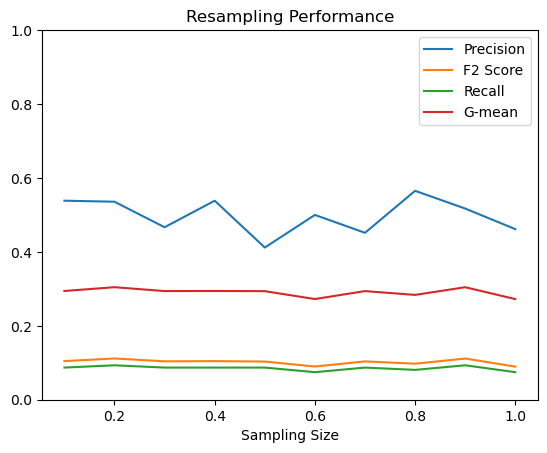

In [70]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, XGBClassifier(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[2423  134]
 [ 129   32]]
TN: 2423, FP: 134, FN: 129, TP: 32


Precision:  0.1927710843373494
Recall:  0.19875776397515527
F2:  0.19753086419753088
G-Mean:  0.4339836760705841

Sampling Size: 0.2

Confusion Matrix: 
 [[2375  182]
 [ 120   41]]
TN: 2375, FP: 182, FN: 120, TP: 41


Precision:  0.18385650224215247
Recall:  0.2546583850931677
F2:  0.23644752018454437
G-Mean:  0.48634609516764454

Sampling Size: 0.3

Confusion Matrix: 
 [[2327  230]
 [ 119   42]]
TN: 2327, FP: 230, FN: 119, TP: 42


Precision:  0.15441176470588236
Recall:  0.2608695652173913
F2:  0.22925764192139736
G-Mean:  0.48724179538788315

Sampling Size: 0.4

Confusion Matrix: 
 [[2325  232]
 [ 116   45]]
TN: 2325, FP: 232, FN: 116, TP: 45


Precision:  0.1624548736462094
Recall:  0.2795031055900621
F2:  0.24429967426710095
G-Mean:  0.5041263911583836

Sampling Size: 0.5

Confusion Matrix: 
 [[2304  253]
 [ 111   50]]
TN: 2304, FP: 253, FN: 111, TP: 50


Precision:  0.165016501

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.192771,0.197531,0.198758,0.433984,0.1
1,0.183857,0.236448,0.254658,0.486346,0.2
2,0.154412,0.229258,0.260870,0.487242,0.3
3,0.162455,0.244300,0.279503,0.504126,0.4
4,0.165017,0.263992,0.310559,0.528991,0.5
5,0.181818,0.294118,0.347826,0.559952,0.6
6,0.160772,0.261780,0.310559,0.528071,0.7
7,0.150150,0.255885,0.310559,0.525535,0.8


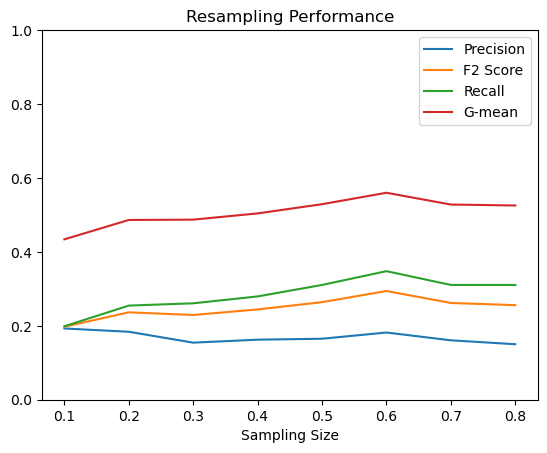

In [71]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, XGBClassifier(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[2541   16]
 [ 147   14]]
TN: 2541, FP: 16, FN: 147, TP: 14


Precision:  0.4666666666666667
Recall:  0.08695652173913043
F2:  0.10385756676557864
G-Mean:  0.29395987114306005

Sampling Size: 2

Confusion Matrix: 
 [[2512   45]
 [ 145   16]]
TN: 2512, FP: 45, FN: 145, TP: 16


Precision:  0.26229508196721313
Recall:  0.09937888198757763
F2:  0.11347517730496455
G-Mean:  0.31245789801818746

Sampling Size: 3

Confusion Matrix: 
 [[2490   67]
 [ 137   24]]
TN: 2490, FP: 67, FN: 137, TP: 24


Precision:  0.26373626373626374
Recall:  0.14906832298136646
F2:  0.16326530612244897
G-Mean:  0.38100176922369383

Sampling Size: 4

Confusion Matrix: 
 [[2455  102]
 [ 136   25]]
TN: 2455, FP: 102, FN: 136, TP: 25


Precision:  0.1968503937007874
Recall:  0.15527950310559005
F2:  0.1621271076523995
G-Mean:  0.38611569069792784

Sampling Size: 5

Confusion Matrix: 
 [[2441  116]
 [ 135   26]]
TN: 2441, FP: 116, FN: 135, TP: 26


Precision:  0.18309859154929578


,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.466667,0.103858,0.086957,0.293960,1
1,0.262295,0.113475,0.099379,0.312458,2
2,0.263736,0.163265,0.149068,0.381002,3
3,0.196850,0.162127,0.155280,0.386116,4
4,0.183099,0.165394,0.161491,0.392638,5
5,0.200000,0.213675,0.217391,0.453309,6
6,0.188571,0.201465,0.204969,0.439984,7
7,0.165049,0.200000,0.211180,0.443818,8
8,0.194805,0.257143,0.279503,0.509089,9
9,0.173333,0.224396,0.242236,0.473936,10


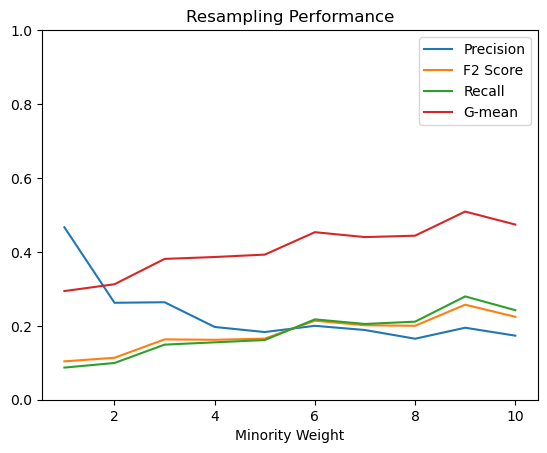

In [72]:
get_performance_weighing('scale', X_train, X_val, y_train, y_val, XGBClassifier)

### Logistic Regression

Sampling Size: 0.1

Confusion Matrix: 
 [[2550    7]
 [ 159    2]]
TN: 2550, FP: 7, FN: 159, TP: 2


Precision:  0.2222222222222222
Recall:  0.012422360248447204
F2:  0.015313935681470138
G-Mean:  0.11130297841883806

Sampling Size: 0.2

Confusion Matrix: 
 [[2492   65]
 [ 149   12]]
TN: 2492, FP: 65, FN: 149, TP: 12


Precision:  0.15584415584415584
Recall:  0.07453416149068323
F2:  0.08321775312066575
G-Mean:  0.2695171093039924

Sampling Size: 0.3

Confusion Matrix: 
 [[2368  189]
 [ 126   35]]
TN: 2368, FP: 189, FN: 126, TP: 35


Precision:  0.15625
Recall:  0.21739130434782608
F2:  0.20161290322580647
G-Mean:  0.44869018461942956

Sampling Size: 0.4

Confusion Matrix: 
 [[2240  317]
 [ 107   54]]
TN: 2240, FP: 317, FN: 107, TP: 54


Precision:  0.14555256064690028
Recall:  0.33540372670807456
F2:  0.2660098522167488
G-Mean:  0.5420540417803716

Sampling Size: 0.5

Confusion Matrix: 
 [[2094  463]
 [  89   72]]
TN: 2094, FP: 463, FN: 89, TP: 72


Precision:  0.13457943925233645
Rec

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.222222,0.015314,0.012422,0.111303,0.1
1,0.155844,0.083218,0.074534,0.269517,0.2
2,0.156250,0.201613,0.217391,0.448690,0.3
3,0.145553,0.266010,0.335404,0.542054,0.4
4,0.134579,0.305344,0.447205,0.605168,0.5
5,0.127628,0.324427,0.527950,0.638741,0.6
6,0.131714,0.361150,0.639752,0.685469,0.7
7,0.128806,0.367156,0.683230,0.696012,0.8
8,0.124204,0.368852,0.726708,0.701598,0.9
9,0.125000,0.377764,0.763975,0.711848,1.0


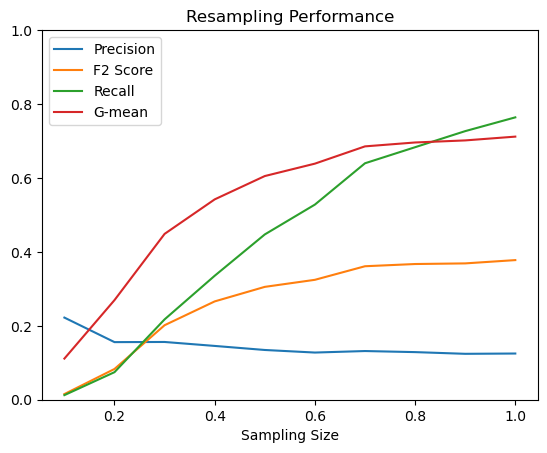

In [73]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, LogisticRegression(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[2463   94]
 [ 143   18]]
TN: 2463, FP: 94, FN: 143, TP: 18


Precision:  0.16071428571428573
Recall:  0.11180124223602485
F2:  0.11904761904761905
G-Mean:  0.3281634104299046

Sampling Size: 0.2

Confusion Matrix: 
 [[2116  441]
 [  90   71]]
TN: 2116, FP: 441, FN: 90, TP: 71


Precision:  0.138671875
Recall:  0.4409937888198758
F2:  0.3070934256055363
G-Mean:  0.6040998167821579

Sampling Size: 0.3

Confusion Matrix: 
 [[1850  707]
 [  62   99]]
TN: 1850, FP: 707, FN: 62, TP: 99


Precision:  0.1228287841191067
Recall:  0.6149068322981367
F2:  0.34137931034482766
G-Mean:  0.6669989641712609

Sampling Size: 0.4

Confusion Matrix: 
 [[1719  838]
 [  43  118]]
TN: 1719, FP: 838, FN: 43, TP: 118


Precision:  0.12343096234309624
Recall:  0.7329192546583851
F2:  0.36874999999999997
G-Mean:  0.7019410483348388

Sampling Size: 0.5

Confusion Matrix: 
 [[1633  924]
 [  30  131]]
TN: 1633, FP: 924, FN: 30, TP: 131


Precision:  0.12417061611374408
Reca

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.160714,0.119048,0.111801,0.328163,0.1
1,0.138672,0.307093,0.440994,0.604100,0.2
2,0.122829,0.341379,0.614907,0.666999,0.3
3,0.123431,0.368750,0.732919,0.701941,0.4
4,0.124171,0.385521,0.813665,0.720859,0.5
5,0.126479,0.398738,0.863354,0.734314,0.6
6,0.126872,0.404722,0.894410,0.740114,0.7
7,0.125977,0.403900,0.900621,0.739114,0.8


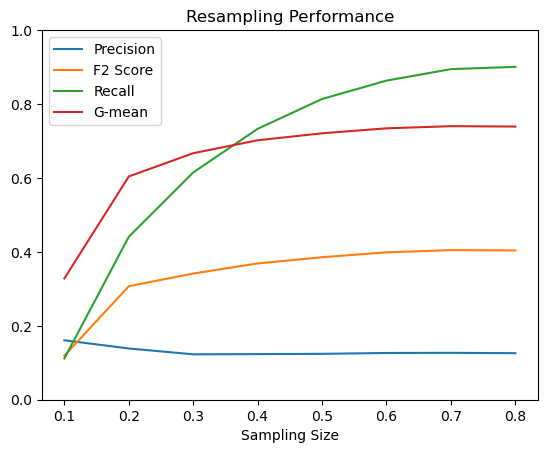

In [74]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, LogisticRegression(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[2554    3]
 [ 161    0]]
TN: 2554, FP: 3, FN: 161, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0

Sampling Size: 2

Confusion Matrix: 
 [[2537   20]
 [ 158    3]]
TN: 2537, FP: 20, FN: 158, TP: 3


Precision:  0.13043478260869565
Recall:  0.018633540372670808
F2:  0.022488755622188907
G-Mean:  0.1359698313715265

Sampling Size: 3

Confusion Matrix: 
 [[2513   44]
 [ 156    5]]
TN: 2513, FP: 44, FN: 156, TP: 5


Precision:  0.10204081632653061
Recall:  0.031055900621118012
F2:  0.03607503607503607
G-Mean:  0.1747040385329715

Sampling Size: 4

Confusion Matrix: 
 [[2457  100]
 [ 145   16]]
TN: 2457, FP: 100, FN: 145, TP: 16


Precision:  0.13793103448275862
Recall:  0.09937888198757763
F2:  0.10526315789473685
G-Mean:  0.3090183487568205

Sampling Size: 5

Confusion Matrix: 
 [[2388  169]
 [ 128   33]]
TN: 2388, FP: 169, FN: 128, TP: 33


Precision:  0.16336633663366337
Recall:  0.20496894409937888
F2:  0.19503546099290783
G-Mean:  0.

,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.000000,0.000000,0.000000,0.000000,1
1,0.130435,0.022489,0.018634,0.135970,2
2,0.102041,0.036075,0.031056,0.174704,3
3,0.137931,0.105263,0.099379,0.309018,4
4,0.163366,0.195035,0.204969,0.437518,5
5,0.155488,0.262346,0.316770,0.531464,6
6,0.138229,0.289070,0.397516,0.579212,7
7,0.135000,0.325563,0.503106,0.633237,8
8,0.135286,0.356356,0.602484,0.675573,9
9,0.132859,0.376597,0.695652,0.704825,10


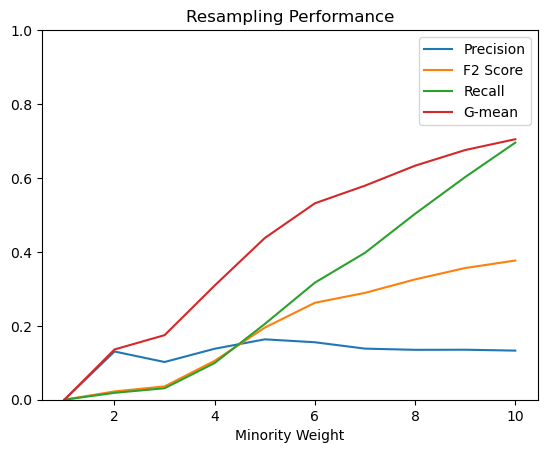

In [75]:
get_performance_weighing('dict',X_train, X_val, y_train, y_val, LogisticRegression)

In [76]:
newLR = LogisticRegression(class_weight="balanced", random_state=19)
newLR.fit(X_train, y_train)
y_pred = newLR.predict(X_val)
evaluate_results(y_val, y_pred)

Confusion Matrix: 
 [[1524 1033]
 [  12  149]]
TN: 1524, FP: 1033, FN: 12, TP: 149


Precision:  0.1260575296108291
Recall:  0.9254658385093167
F2:  0.4079956188389923
G-Mean:  0.7426895541948388


### Linear SVC

Sampling Size: 0.1

Confusion Matrix: 
 [[2556    1]
 [ 160    1]]
TN: 2556, FP: 1, FN: 160, TP: 1


Precision:  0.5
Recall:  0.006211180124223602
F2:  0.007739938080495355
G-Mean:  0.07879562827593363

Sampling Size: 0.2

Confusion Matrix: 
 [[2509   48]
 [ 152    9]]
TN: 2509, FP: 48, FN: 152, TP: 9


Precision:  0.15789473684210525
Recall:  0.055900621118012424
F2:  0.06419400855920114
G-Mean:  0.23420344733976972

Sampling Size: 0.3

Confusion Matrix: 
 [[2386  171]
 [ 126   35]]
TN: 2386, FP: 171, FN: 126, TP: 35


Precision:  0.16990291262135923
Recall:  0.21739130434782608
F2:  0.2058823529411765
G-Mean:  0.4503922820533753

Sampling Size: 0.4

Confusion Matrix: 
 [[2239  318]
 [ 109   52]]
TN: 2239, FP: 318, FN: 109, TP: 52


Precision:  0.14054054054054055
Recall:  0.32298136645962733
F2:  0.25641025641025644
G-Mean:  0.5318025513833526

Sampling Size: 0.5

Confusion Matrix: 
 [[2084  473]
 [  87   74]]
TN: 2084, FP: 473, FN: 87, TP: 74


Precision:  0.13528336380255943
Recall

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.500000,0.007740,0.006211,0.078796,0.1
1,0.157895,0.064194,0.055901,0.234203,0.2
2,0.169903,0.205882,0.217391,0.450392,0.3
3,0.140541,0.256410,0.322981,0.531803,0.4
4,0.135283,0.310663,0.459627,0.612049,0.5
5,0.128093,0.330579,0.546584,0.646948,0.6
6,0.131677,0.365769,0.658385,0.691668,0.7
7,0.128492,0.373619,0.714286,0.704554,0.8
8,0.126135,0.382263,0.776398,0.716553,0.9
9,0.123552,0.380952,0.795031,0.716040,1.0


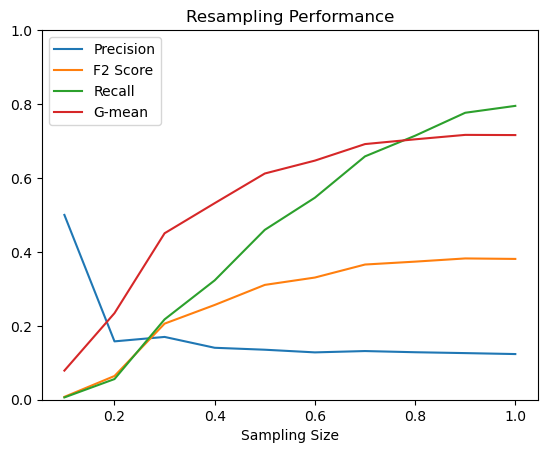

In [77]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, LinearSVC(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[2494   63]
 [ 150   11]]
TN: 2494, FP: 63, FN: 150, TP: 11


Precision:  0.14864864864864866
Recall:  0.06832298136645963
F2:  0.07660167130919221
G-Mean:  0.25814651423385004

Sampling Size: 0.2

Confusion Matrix: 
 [[2113  444]
 [  86   75]]
TN: 2113, FP: 444, FN: 86, TP: 75


Precision:  0.14450867052023122
Recall:  0.4658385093167702
F2:  0.3224419604471195
G-Mean:  0.6204432701393564

Sampling Size: 0.3

Confusion Matrix: 
 [[1835  722]
 [  61  100]]
TN: 1835, FP: 722, FN: 61, TP: 100


Precision:  0.12165450121654502
Recall:  0.6211180124223602
F2:  0.34106412005457026
G-Mean:  0.6676359781303781

Sampling Size: 0.4

Confusion Matrix: 
 [[1689  868]
 [  36  125]]
TN: 1689, FP: 868, FN: 36, TP: 125


Precision:  0.12588116817724068
Recall:  0.7763975155279503
F2:  0.38179596823457546
G-Mean:  0.7161294422593389

Sampling Size: 0.5

Confusion Matrix: 
 [[1593  964]
 [  24  137]]
TN: 1593, FP: 964, FN: 24, TP: 137


Precision:  0.12443233424

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.148649,0.076602,0.068323,0.258147,0.1
1,0.144509,0.322442,0.465839,0.620443,0.2
2,0.121655,0.341064,0.621118,0.667636,0.3
3,0.125881,0.381796,0.776398,0.716129,0.4
4,0.124432,0.392550,0.850932,0.728098,0.5
5,0.125654,0.402235,0.894410,0.737510,0.6
6,0.125213,0.404290,0.913043,0.739139,0.7
7,0.125632,0.407104,0.925466,0.741714,0.8


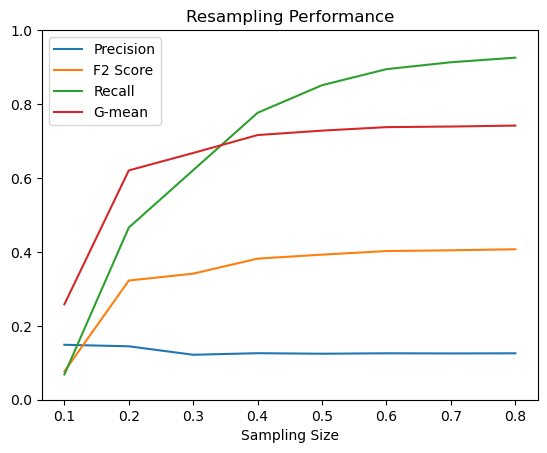

In [78]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, LinearSVC(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[2556    1]
 [ 160    1]]
TN: 2556, FP: 1, FN: 160, TP: 1


Precision:  0.5
Recall:  0.006211180124223602
F2:  0.007739938080495355
G-Mean:  0.07879562827593363

Sampling Size: 2

Confusion Matrix: 
 [[2553    4]
 [ 160    1]]
TN: 2553, FP: 4, FN: 160, TP: 1


Precision:  0.2
Recall:  0.006211180124223602
F2:  0.007704160246533127
G-Mean:  0.0787493731335408

Sampling Size: 3

Confusion Matrix: 
 [[2498   59]
 [ 155    6]]
TN: 2498, FP: 59, FN: 155, TP: 6


Precision:  0.09230769230769231
Recall:  0.037267080745341616
F2:  0.04231311706629055
G-Mean:  0.1908066647197413

Sampling Size: 4

Confusion Matrix: 
 [[2500   57]
 [ 155    6]]
TN: 2500, FP: 57, FN: 155, TP: 6


Precision:  0.09523809523809523
Recall:  0.037267080745341616
F2:  0.042432814710042434
G-Mean:  0.19088303320977923

Sampling Size: 5

Confusion Matrix: 
 [[2437  120]
 [ 138   23]]
TN: 2437, FP: 120, FN: 138, TP: 23


Precision:  0.16083916083916083
Recall:  0.14285714285714285
F2

,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.500000,0.007740,0.006211,0.078796,1
1,0.200000,0.007704,0.006211,0.078749,2
2,0.092308,0.042313,0.037267,0.190807,3
3,0.095238,0.042433,0.037267,0.190883,4
4,0.160839,0.146125,0.142857,0.368989,5
5,0.142857,0.200893,0.223602,0.452453,6
6,0.150538,0.227519,0.260870,0.486508,7
7,0.156658,0.292113,0.372671,0.570609,8
8,0.147110,0.345679,0.521739,0.649900,9
9,0.140600,0.348473,0.552795,0.659688,10


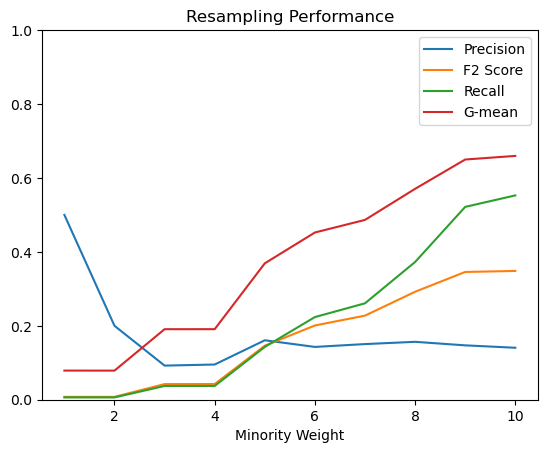

In [79]:
get_performance_weighing('dict',X_train, X_val, y_train, y_val, LinearSVC)

In [80]:
newSVC = LinearSVC(class_weight="balanced", random_state=19)
newSVC.fit(X_train, y_train)
y_pred = newSVC.predict(X_val)
evaluate_results(y_val, y_pred)

Confusion Matrix: 
 [[1542 1015]
 [  16  145]]
TN: 1542, FP: 1015, FN: 16, TP: 145


Precision:  0.125
Recall:  0.9006211180124224
F2:  0.40188470066518844
G-Mean:  0.7369667362018131


## Random Forest

Sampling Size: 0.1

Confusion Matrix: 
 [[2553    4]
 [ 154    7]]
TN: 2553, FP: 4, FN: 154, TP: 7


Precision:  0.6363636363636364
Recall:  0.043478260869565216
F2:  0.053435114503816786
G-Mean:  0.20835125721358025

Sampling Size: 0.2

Confusion Matrix: 
 [[2549    8]
 [ 151   10]]
TN: 2549, FP: 8, FN: 151, TP: 10


Precision:  0.5555555555555556
Recall:  0.062111801242236024
F2:  0.0755287009063444
G-Mean:  0.24883222085629655

Sampling Size: 0.3

Confusion Matrix: 
 [[2547   10]
 [ 152    9]]
TN: 2547, FP: 10, FN: 152, TP: 9


Precision:  0.47368421052631576
Recall:  0.055900621118012424
F2:  0.06787330316742082
G-Mean:  0.23597034373795414

Sampling Size: 0.4

Confusion Matrix: 
 [[2544   13]
 [ 151   10]]
TN: 2544, FP: 13, FN: 151, TP: 10


Precision:  0.43478260869565216
Recall:  0.062111801242236024
F2:  0.07496251874062969
G-Mean:  0.24858805219690705

Sampling Size: 0.5

Confusion Matrix: 
 [[2542   15]
 [ 153    8]]
TN: 2542, FP: 15, FN: 153, TP: 8


Precision:  0.3478260869

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.636364,0.053435,0.043478,0.208351,0.1
1,0.555556,0.075529,0.062112,0.248832,0.2
2,0.473684,0.067873,0.055901,0.235970,0.3
3,0.434783,0.074963,0.062112,0.248588,0.4
4,0.347826,0.059970,0.049689,0.222256,0.5
5,0.454545,0.075075,0.062112,0.248637,0.6
6,0.333333,0.059880,0.049689,0.222213,0.7
7,0.379310,0.081724,0.068323,0.260465,0.8
8,0.481481,0.096870,0.080745,0.283378,0.9
9,0.437500,0.103550,0.086957,0.293844,1.0


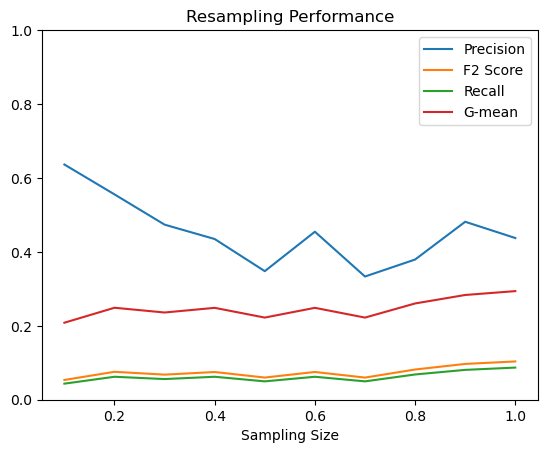

In [190]:
get_performance_visualisation("SMOTE", X_train, X_val, y_train, y_val, RandomForestClassifier(random_state=19))

Sampling Size: 0.1

Confusion Matrix: 
 [[2498   59]
 [ 143   18]]
TN: 2498, FP: 59, FN: 143, TP: 18


Precision:  0.23376623376623376
Recall:  0.11180124223602485
F2:  0.1248266296809986
G-Mean:  0.330486837717352

Sampling Size: 0.2

Confusion Matrix: 
 [[2408  149]
 [ 129   32]]
TN: 2408, FP: 149, FN: 129, TP: 32


Precision:  0.17679558011049723
Recall:  0.19875776397515527
F2:  0.19393939393939394
G-Mean:  0.43263826513610876

Sampling Size: 0.3

Confusion Matrix: 
 [[2371  186]
 [ 121   40]]
TN: 2371, FP: 186, FN: 121, TP: 40


Precision:  0.17699115044247787
Recall:  0.2484472049689441
F2:  0.22988505747126436
G-Mean:  0.4799737327341265

Sampling Size: 0.4

Confusion Matrix: 
 [[2338  219]
 [ 121   40]]
TN: 2338, FP: 219, FN: 121, TP: 40


Precision:  0.15444015444015444
Recall:  0.2484472049689441
F2:  0.22148394241417496
G-Mean:  0.47662184891840886

Sampling Size: 0.5

Confusion Matrix: 
 [[2318  239]
 [ 114   47]]
TN: 2318, FP: 239, FN: 114, TP: 47


Precision:  0.164335664

,Precision,F2 Score,Recall,G-mean,Sampling Size
0,0.233766,0.124827,0.111801,0.330487,0.1
1,0.176796,0.193939,0.198758,0.432638,0.2
2,0.176991,0.229885,0.248447,0.479974,0.3
3,0.154440,0.221484,0.248447,0.476622,0.4
4,0.164336,0.252688,0.291925,0.514431,0.5
5,0.160959,0.251068,0.291925,0.513765,0.6
6,0.156997,0.245464,0.285714,0.508050,0.7
7,0.160000,0.268318,0.322981,0.537120,0.8


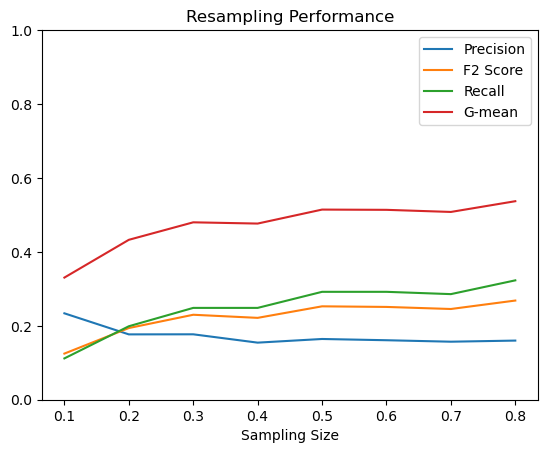

In [191]:
get_performance_visualisation("SMOTEENN", X_train, X_val, y_train, y_val, RandomForestClassifier(random_state=19))

Sampling Size: 1

Confusion Matrix: 
 [[2554    3]
 [ 155    6]]
TN: 2554, FP: 3, FN: 155, TP: 6


Precision:  0.6666666666666666
Recall:  0.037267080745341616
F2:  0.04594180704441042
G-Mean:  0.19293355629983286

Sampling Size: 2

Confusion Matrix: 
 [[2556    1]
 [ 156    5]]
TN: 2556, FP: 1, FN: 156, TP: 5


Precision:  0.8333333333333334
Recall:  0.031055900621118012
F2:  0.038461538461538464
G-Mean:  0.17619238115479213

Sampling Size: 3

Confusion Matrix: 
 [[2556    1]
 [ 156    5]]
TN: 2556, FP: 1, FN: 156, TP: 5


Precision:  0.8333333333333334
Recall:  0.031055900621118012
F2:  0.038461538461538464
G-Mean:  0.17619238115479213

Sampling Size: 4

Confusion Matrix: 
 [[2557    0]
 [ 155    6]]
TN: 2557, FP: 0, FN: 155, TP: 6


Precision:  1.0
Recall:  0.037267080745341616
F2:  0.046153846153846156
G-Mean:  0.19304683562633604

Sampling Size: 5

Confusion Matrix: 
 [[2555    2]
 [ 156    5]]
TN: 2555, FP: 2, FN: 156, TP: 5


Precision:  0.7142857142857143
Recall:  0.03105590062

,Precision,F2 Score,Recall,G-mean,Minority Weight
0,0.666667,0.045942,0.037267,0.192934,1
1,0.833333,0.038462,0.031056,0.176192,2
2,0.833333,0.038462,0.031056,0.176192,3
3,1.000000,0.046154,0.037267,0.193047,4
4,0.714286,0.038402,0.031056,0.176158,5
5,0.857143,0.046083,0.037267,0.193009,6
6,0.777778,0.053599,0.043478,0.208433,7
7,1.000000,0.038521,0.031056,0.176227,8
8,0.777778,0.053599,0.043478,0.208433,9
9,0.714286,0.038402,0.031056,0.176158,10


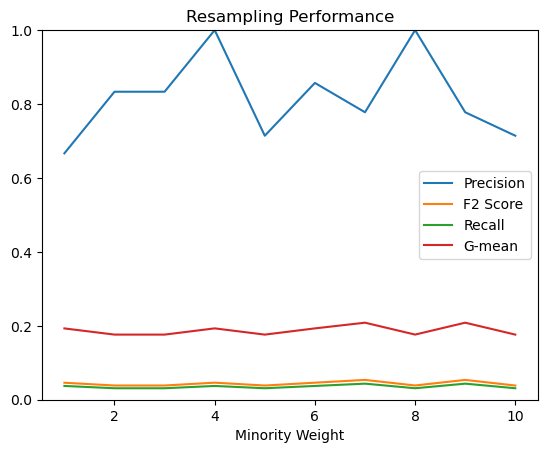

In [192]:
get_performance_weighing('dict',X_train, X_val, y_train, y_val, RandomForestClassifier)

In [193]:
newrf = RandomForestClassifier(class_weight="balanced", random_state=19)
newrf.fit(X_train, y_train)
y_pred = newrf.predict(X_val)
evaluate_results(y_val, y_pred)

Confusion Matrix: 
 [[2556    1]
 [ 156    5]]
TN: 2556, FP: 1, FN: 156, TP: 5


Precision:  0.8333333333333334
Recall:  0.031055900621118012
F2:  0.038461538461538464
G-Mean:  0.17619238115479213


##  Using Class Weighing on Voting Classifier

In [194]:
vc_class = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19)),
                ('XGB',XGBClassifier(random_state=19)),
                ('LR',LogisticRegression(random_state=19))],
    voting='hard'
)

In [197]:
train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val,5,0.8, vc_class)

Confusion Matrix: 
 [[1558  999]
 [  16  145]]
TN: 1558, FP: 999, FN: 16, TP: 145


Precision:  0.12674825174825174
Recall:  0.9006211180124224
F2:  0.4054809843400448
G-Mean:  0.7407803023439352


(0.12674825174825174,
 0.9006211180124224,
 0.4054809843400448,
 0.7407803023439352)

In [198]:
vc_class_2 = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19)),
                ('XGB',XGBClassifier(random_state=19)),
                ('LR',LogisticRegression(random_state=19)),
               ('RF',RandomForestClassifier(random_state=19)),
               ('Ada',AdaBoostClassifier(random_state=19))],
    voting='hard'
)

In [199]:
train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val,5,0.8, vc_class_2)

Confusion Matrix: 
 [[1856  701]
 [  53  108]]
TN: 1856, FP: 701, FN: 53, TP: 108


Precision:  0.1334981458590853
Recall:  0.6708074534161491
F2:  0.3716448726772195
G-Mean:  0.6977864979286866


(0.1334981458590853,
 0.6708074534161491,
 0.3716448726772195,
 0.6977864979286866)

In [200]:
vc_class_3 = VotingClassifier(
    estimators=[('XGB',XGBClassifier(random_state=19)),
               ('RF',RandomForestClassifier(random_state=19)),
               ('Ada',AdaBoostClassifier(random_state=19))],
    voting='hard'
)

In [202]:
train_data_with_SMOTEENN_val(X_train, X_val, y_train, y_val,5,0.8, vc_class_3)

Confusion Matrix: 
 [[2231  326]
 [  99   62]]
TN: 2231, FP: 326, FN: 99, TP: 62


Precision:  0.15979381443298968
Recall:  0.38509316770186336
F2:  0.3003875968992248
G-Mean:  0.5796519855751815


(0.15979381443298968,
 0.38509316770186336,
 0.3003875968992248,
 0.5796519855751815)

# Hyper parameter tuning for XGB

In [83]:
# hyperopt - used for Bayesian hyperparameter tuning
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from hyperopt.pyll import scope

# for timing
from time import time
from tqdm import tqdm

import os
import pickle

In [84]:
def evaluate_F2(X_train, X_val, y_train, y_val, classifier, sampling):

    ennObj = EditedNearestNeighbours(n_neighbors=5)
    smote_only = SMOTE(random_state=19, sampling_strategy=sampling)
    smote_enn = SMOTEENN(smote=smote_only , enn= ennObj)
    X_res_smoteENN, y_res_smoteENN = smote_enn.fit_resample(X_train, y_train)

    clf = classifier
    clf.fit(X_res_smoteENN, y_res_smoteENN)

    # predict on validation set
    y_preds = clf.predict(X_val)

    # Evaluate results
    F2 = fbeta_score(y_val, y_preds, beta=2)
    return F2

In [85]:
def hyperopt(param_space, num_eval, classifier, use_scaling = False):
    start = time()
    def objective_function(params):
        clf = classifier(**params)

        if use_scaling: clf = scale_classifier(clf)
        score = evaluate_F2(X_train, X_val, y_train, y_val, clf, 0.8)

        return {'loss': -score, 'status': STATUS_OK}
    trials = Trials()
    best_param = fmin(objective_function, param_space, algo=tpe.suggest, max_evals=num_eval,
                      trials=trials)
    loss = [x['result']['loss'] for x in trials.trials]
    best_param_values = best_param
    #print(loss)
    return trials, best_param_values

In [86]:
# XGB Bayesian hyperopt

num_eval = 100

XGB_param_hyperopt = {
    'booster': hp.choice('booster', ['dart','gbtree']),
    'learning_rate': hp.uniform('learning_rate', 0.05, 0.5),
    'max_depth': scope.int(hp.quniform('max_depth', 1, 20, 1)),
    'subsample': hp.uniform('subsample', 0.1, 0.5),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.2, 0.7),
    'colsample_bynode': hp.uniform('colsample_bynode', 0.1, 0.8),
    'colsample_bylevel': hp.uniform('colsample_bylevel', 0.1, 0.4),
    'gamma': hp.uniform('gamma', 1, 20),
    'min_child_weight': hp.uniform('min_child_weight', 1.5, 2.5),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 550, 20)),
    'reg_lambda': hp.uniform('reg_lambda', 1, 6),
    'reg_alpha':hp.uniform('reg_alpha', 0.02, 0.1),
    'scale_pos_weight':hp.uniform('scale_pos_weight', 1, 10)
}

if not os.path.exists('TuningFS'): os.mkdir('TuningFS')

def save_file(path, data):
    output = open(path, 'wb')
    pickle.dump(data, output)
    output.close()

def load_file(path):
    pkl_file = open(path, 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()
    return data

In [87]:
load = False #put load = True if you don't want to load the whole thing again
if(load == False):
    XGB_hyperopt = hyperopt(XGB_param_hyperopt,  num_eval, XGBClassifier)
    save_file('TuningFS/XGB_hyperopt.pkl', XGB_hyperopt)
else:
    try:
        XGB_hyperopt = load_file('TuningFS/XGB_hyperopt.pkl')
    except Exception as e:
        print(e)

100%|██████████| 100/100 [15:47<00:00,  9.47s/trial, best loss: -0.4096581660336408]


In [88]:
XGB_hyperopt[1]

{'booster': 0,
 'colsample_bylevel': 0.19151572699658645,
 'colsample_bynode': 0.6329283822987078,
 'colsample_bytree': 0.3865791309646543,
 'gamma': 16.60120812043403,
 'learning_rate': 0.1866255601330448,
 'max_depth': 8.0,
 'min_child_weight': 1.749492711643751,
 'n_estimators': 540.0,
 'reg_alpha': 0.08277604446149361,
 'reg_lambda': 4.451367764866161,
 'scale_pos_weight': 7.919235255732057,
 'subsample': 0.2076764026764466}

In [89]:
trials = XGB_hyperopt[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [90]:
bayesTrialsData.sort_values(by='loss')

,loss,booster,colsample_bylevel,colsample_bynode,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,n_estimators,reg_alpha,reg_lambda,scale_pos_weight,subsample
90,-0.409658,[0],[0.19151572699658645],[0.6329283822987078],[0.3865791309646543],[16.60120812043403],[0.1866255601330448],[8.0],[1.749492711643751],[540.0],[0.08277604446149361],[4.451367764866161],[7.919235255732057],[0.2076764026764466]
93,-0.409471,[0],[0.22494925286321146],[0.7998908338400603],[0.4419487324977333],[18.17861591290695],[0.2396906973553982],[6.0],[1.9647438437649858],[480.0],[0.08672409792698169],[5.367882913066752],[5.136981614174474],[0.15301475420936214]
80,-0.406758,[1],[0.24820165646923426],[0.6976895049491914],[0.37634183049919484],[6.086361603124004],[0.1635963493997701],[8.0],[1.7614214422417103],[360.0],[0.0917472132546593],[5.009072631144652],[7.912016181041552],[0.363495327553889]
31,-0.406699,[0],[0.37820072856019105],[0.4234785140235286],[0.2861548752067796],[3.120912105721594],[0.14643261185206102],[20.0],[1.6187680470422117],[280.0],[0.088426110696496],[1.788656068447556],[4.37356914836289],[0.26570664736101146]
57,-0.406351,[1],[0.3010509344095089],[0.5196034479251982],[0.20184563344422413],[11.226228856462573],[0.14693548660536573],[13.0],[1.5842318126186468],[180.0],[0.05727313343734695],[4.9927953639932205],[8.47534891508078],[0.3543100244504304]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,-0.314685,[0],[0.27361042727782703],[0.5970071961052026],[0.5032384428462213],[8.878296073349254],[0.377369975401263],[8.0],[1.6522746236418113],[380.0],[0.06146049195876007],[2.2586232331479534],[2.9619205124506593],[0.4714336548674028]
60,-0.309675,[1],[0.3495939681791183],[0.1440202052520897],[0.32656458074817635],[15.16710443603097],[0.11030422688114279],[2.0],[1.6599979491915686],[80.0],[0.047929222199682375],[5.766070407865156],[1.009913770695424],[0.3541854755011202]
87,-0.309320,[1],[0.20795329564482362],[0.28496955822207504],[0.33715715759060333],[5.666177337523772],[0.05020764285327747],[4.0],[1.6195817142081859],[80.0],[0.07670341359275183],[3.904267344745553],[1.9710664680057985],[0.2932248158868228]
15,-0.284043,[0],[0.2861178614592421],[0.17674891740181597],[0.6037906143926959],[8.72532339401416],[0.2323726087685452],[14.0],[1.9140536670191193],[320.0],[0.09663500287155227],[3.160478490901445],[1.0834513406053539],[0.4528979846592037]


In [91]:
xg_chosen = XGB_hyperopt[1]

xgboost_model_1   =   XGBClassifier(booster=['dart','gbtree'][xg_chosen['booster']],
                                  colsample_bytree=xg_chosen['colsample_bytree'],
                                  colsample_bynode = xg_chosen['colsample_bynode'],
                                  colsample_bylevel = xg_chosen['colsample_bylevel'],
                                  n_estimators = int(xg_chosen['n_estimators']),
                                  reg_alpha = xg_chosen['reg_alpha'],
                                  reg_lambda = xg_chosen['reg_lambda'],
                                  max_depth=int(xg_chosen['max_depth']),
                                  subsample = xg_chosen['subsample'],
                                  gamma = xg_chosen['gamma'],
                                  min_child_weight = xg_chosen['min_child_weight'],
                                  scale_pos_weight = xg_chosen['scale_pos_weight'],
                                  learning_rate=xg_chosen['learning_rate'],
                                  random_state=19)

In [92]:
xgboost_model_1

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=0.19151572699658645,
              colsample_bynode=0.6329283822987078,
              colsample_bytree=0.3865791309646543, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=16.60120812043403, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1866255601330448, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1.749492711643751, missing=nan,
              monotone_constraints=None, n_estimators=540, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=19, ...)

## Second Round of Tuning for XGB

In [93]:
# parameters = xg_chosen.keys()

In [94]:
# sorted_results = bayesTrialsData.sort_values('loss')
# sorted_results

In [95]:
# sorted_results.reset_index(inplace=True)

In [96]:
# sorted_results

In [97]:
# sorted_results.drop('index',axis=1,inplace=True)

In [98]:
# top_10 = sorted_results.iloc[0:10]
# top_10

In [99]:
# for i in parameters:
#     minimum = top_10[i].min()
#     maximum = top_10[i].max()
#     print(i,'Min:',minimum,'Max:',maximum)

In [100]:
# # XGB Bayesian hyperopt2

# num_eval_2 = 100


# XGB_param_hyperopt2 = {
#     'booster': hp.choice('booster', ['gbtree']),
#     'learning_rate': hp.uniform('learning_rate', top_10['learning_rate'].min()[0], top_10['learning_rate'].max()[0]),
#     'max_depth': scope.int(hp.quniform('max_depth', top_10['max_depth'].min()[0], top_10['max_depth'].max()[0], 1)),
#     'subsample': hp.uniform('subsample', top_10['subsample'].min()[0], top_10['subsample'].max()[0]),
#     'colsample_bytree': hp.uniform('colsample_bytree', top_10['colsample_bytree'].min()[0], top_10['colsample_bytree'].max()[0]),
#     'colsample_bynode': hp.uniform('colsample_bynode', top_10['colsample_bynode'].min()[0], top_10['colsample_bynode'].max()[0]),
#     'colsample_bylevel': hp.uniform('colsample_bylevel', top_10['colsample_bylevel'].min()[0], top_10['colsample_bylevel'].max()[0]),
#     'gamma': hp.uniform('gamma', top_10['gamma'].min()[0], top_10['gamma'].max()[0]),
#     'min_child_weight': hp.uniform('min_child_weight', top_10['min_child_weight'].min()[0], top_10['min_child_weight'].max()[0]),
#     'n_estimators': scope.int(hp.quniform('n_estimators', top_10['n_estimators'].min()[0], top_10['n_estimators'].max()[0], 20)),
#     'reg_lambda': hp.uniform('reg_lambda', top_10['reg_lambda'].min()[0], top_10['reg_lambda'].max()[0]),
#     'reg_alpha':hp.uniform('reg_alpha', top_10['reg_alpha'].min()[0], top_10['reg_alpha'].max()[0]),
#     'scale_pos_weight':hp.uniform('scale_pos_weight', top_10['scale_pos_weight'].min()[0], top_10['scale_pos_weight'].max()[0])
# }

# if not os.path.exists('TuningFS'): os.mkdir('TuningFS')

# def save_file(path, data):
#     output = open(path, 'wb')
#     pickle.dump(data, output)
#     output.close()

# def load_file(path):
#     pkl_file = open(path, 'rb')
#     data = pickle.load(pkl_file)
#     pkl_file.close()
#     return data

In [101]:
# load = False
# if(load == False):
#     XGB_hyperopt2 = hyperopt(XGB_param_hyperopt2,  num_eval_2, XGBClassifier)
#     save_file('TuningFS/XGB_hyperopt2.pkl', XGB_hyperopt2)
# else:
#     try:
#         XGB_hyperopt2 = load_file('TuningFS/XGB_hyperopt2.pkl')
#     except Exception as e:
#         print(e)

In [102]:
# xg_chosen2 = XGB_hyperopt2[1]
# xg_chosen2

In [103]:
# trials = XGB_hyperopt2[0].trials
# import json

# record = []
# losses = []
# for trial in trials:
#     loss = trial["result"]["loss"]
#     values = trial["misc"]['vals']
#     #print(loss,values)
#     losses.append(loss)
#     record.append(values)

# bayesTrialsData2 = pd.DataFrame(record)

# #if you have time try to make this part of the code more "pandas-like" - I just did an iteration for this
# # I left the values as list.

# bayesTrialsData2.insert(0, 'loss', losses)

In [104]:
# bayesTrialsData2.sort_values(by='loss')

In [105]:
# xg_chosen2 = XGB_hyperopt2[1]

# xgboost_model_2   =   XGBClassifier(booster=['gbtree'][xg_chosen2['booster']],
#                                   colsample_bytree=xg_chosen2['colsample_bytree'],
#                                   colsample_bynode = xg_chosen2['colsample_bynode'],
#                                   colsample_bylevel = xg_chosen2['colsample_bylevel'],
#                                   n_estimators = int(xg_chosen2['n_estimators']),
#                                   reg_alpha = xg_chosen2['reg_alpha'],
#                                   reg_lambda = xg_chosen2['reg_lambda'],
#                                   max_depth=int(xg_chosen2['max_depth']),
#                                   subsample = xg_chosen2['subsample'],
#                                   gamma = xg_chosen2['gamma'],
#                                   min_child_weight = xg_chosen2['min_child_weight'],
#                                   scale_pos_weight = xg_chosen2['scale_pos_weight'],
#                                   learning_rate=xg_chosen2['learning_rate'],
#                                   random_state=19)

In [106]:
# xgboost_model_2.get_xgb_params()

In [107]:
# xgboost_model_2

### Model without tuning

In [108]:
train_model(X_train, X_test, y_train, y_test, XGBClassifier(random_state=19))

Confusion Matrix: 
 [[1411   10]
 [  83    6]]
TN: 1411, FP: 10, FN: 83, TP: 6


Precision:  0.375
Recall:  0.06741573033707865
F2:  0.08064516129032259
G-Mean:  0.25873017948151633


### Model without tuning but with imbalance handling

In [109]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test, 5, 0.8, XGBClassifier(random_state=19))

Confusion Matrix: 
 [[1257  164]
 [  55   34]]
TN: 1257, FP: 164, FN: 55, TP: 34


Precision:  0.1717171717171717
Recall:  0.38202247191011235
F2:  0.30685920577617326
G-Mean:  0.5813197191717885


(0.1717171717171717,
 0.38202247191011235,
 0.30685920577617326,
 0.5813197191717885)

### 1st Round Tuning

In [110]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test, 5, 0.8, xgboost_model_1)

Confusion Matrix: 
 [[814 607]
 [  5  84]]
TN: 814, FP: 607, FN: 5, TP: 84


Precision:  0.12156295224312591
Recall:  0.9438202247191011
F2:  0.4011461318051576
G-Mean:  0.7352919362210795


(0.12156295224312591,
 0.9438202247191011,
 0.4011461318051576,
 0.7352919362210795)

### 2nd Round Tuning

In [111]:
# train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test, 5, 0.8, xgboost_model_2)

### Feature Importance

In [112]:
feature_weight = xgboost_model_1.feature_importances_

In [113]:
weight_df = pd.DataFrame(feature_weight,index = x_var, columns=['weights'])

In [114]:
weight_df.sort_values('weights', ascending=False)

,weights
BasePolicy_Liability,0.130840
Fault,0.116826
BasePolicy_All Perils,0.083978
VehicleCategory_Sport,0.079385
VehicleCategory_Sedan,0.048887
Make,0.026964
DayOfWeek_Friday,0.025320
WeekOfMonthClaimed_3,0.023789
MonthClaimed,0.022118
DayOfWeek_Tuesday,0.021894


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

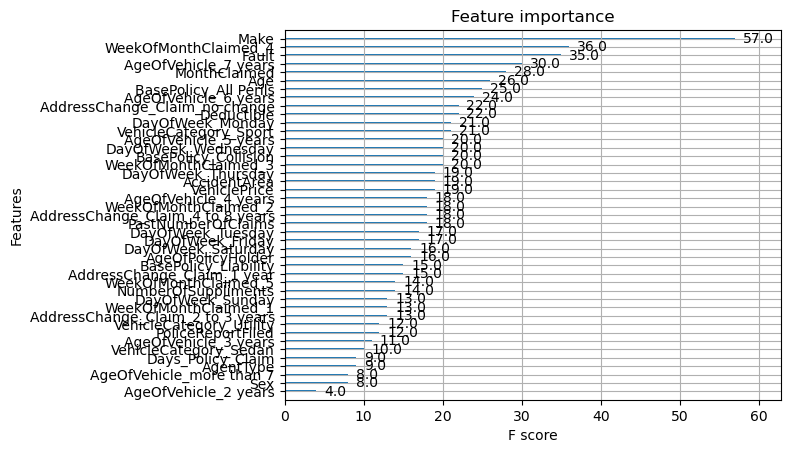

In [115]:
from xgboost import plot_importance
plot_importance(xgboost_model_1)

## Hyper Parameter Tuning for LR

In [116]:
num_eval = 100

LR_param_hyperopt = {
            'warm_start' : hp.choice('warm_start', [True, False]),
            'fit_intercept' : hp.choice('fit_intercept', [True, False]),
            'tol' : hp.uniform('tol', 0.00001, 0.0001),
            'C' : hp.uniform('C', 0.05, 3),
            'solver' : hp.choice('solver', ['lbfgs','newton-cg','liblinear','sag', 'saga']),
            'max_iter' : hp.choice('max_iter', range(100,1000)),
            'multi_class' : 'auto',
            'class_weight' : 'balanced',
}

In [117]:
load = False
if(load == False):
    LR_hyperopt1 = hyperopt(LR_param_hyperopt,  num_eval, LogisticRegression)
    save_file('TuningFS/LR_hyperopt1.pkl', LR_hyperopt1)
else:
    try:
        LR_hyperopt1 = load_file('TuningFS/LR_hyperopt1.pkl')
    except Exception as e:
        print(e)

100%|██████████| 100/100 [01:24<00:00,  1.19trial/s, best loss: -0.4003407155025554]


In [118]:
LR_hyperopt1[1]

{'C': 0.38483951559484364,
 'fit_intercept': 1,
 'max_iter': 625,
 'solver': 1,
 'tol': 2.497446462286831e-05,
 'warm_start': 1}

In [119]:
trials = LR_hyperopt1[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [120]:
bayesTrialsData.sort_values(by='loss')

,loss,C,fit_intercept,max_iter,solver,tol,warm_start
97,-0.400341,[0.38483951559484364],[1],[625],[1],[2.497446462286831e-05],[1]
65,-0.399885,[2.6559538990039635],[1],[210],[0],[6.236074039057156e-05],[1]
79,-0.399885,[2.612077812216334],[1],[794],[1],[3.439277567033789e-05],[1]
51,-0.399885,[2.660035668728218],[1],[657],[2],[7.479801425650578e-05],[0]
54,-0.399885,[2.6859535146476747],[1],[554],[2],[5.9776994981940255e-05],[0]
...,...,...,...,...,...,...,...
58,-0.396736,[0.20182318875810634],[1],[92],[2],[4.6956840086325634e-05],[0]
7,-0.396011,[0.6231375564399231],[0],[89],[1],[8.73713316338657e-05],[0]
83,-0.394511,[0.796726984396104],[1],[551],[1],[1.8431451081218683e-05],[0]
99,-0.392539,[0.0929797854433157],[1],[210],[1],[3.331055191009184e-05],[1]


In [121]:
lr_chosen = LR_hyperopt1[1]

LR_model_1   =   LogisticRegression(warm_start=[True, False][lr_chosen['warm_start']],
                                    fit_intercept=[True, False][lr_chosen['fit_intercept']],
                                    tol= lr_chosen['tol'],
                                    C=lr_chosen['C'],
                                    solver=['lbfgs','newton-cg','liblinear','sag', 'saga'][lr_chosen['solver']],
                                    max_iter=lr_chosen['max_iter'],
                                    multi_class='auto',
                                    class_weight='balanced',
                                    random_state=19)

In [122]:
LR_model_1

LogisticRegression(C=0.38483951559484364, class_weight='balanced',
                   fit_intercept=False, max_iter=625, random_state=19,
                   solver='newton-cg', tol=2.497446462286831e-05)

In [123]:
train_model(X_train, X_test, y_train, y_test, LogisticRegression(random_state=19))

Confusion Matrix: 
 [[1417    4]
 [  89    0]]
TN: 1417, FP: 4, FN: 89, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0


In [124]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,LogisticRegression(random_state=19))

Confusion Matrix: 
 [[840 581]
 [  7  82]]
TN: 840, FP: 581, FN: 7, TP: 82


Precision:  0.12368024132730016
Recall:  0.9213483146067416
F2:  0.40235525024533864
G-Mean:  0.7379968819697605


(0.12368024132730016,
 0.9213483146067416,
 0.40235525024533864,
 0.7379968819697605)

In [125]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,LR_model_1)

Confusion Matrix: 
 [[861 560]
 [  9  80]]
TN: 861, FP: 560, FN: 9, TP: 80


Precision:  0.125
Recall:  0.898876404494382
F2:  0.4016064257028113
G-Mean:  0.7379968819697605


(0.125, 0.898876404494382, 0.4016064257028113, 0.7379968819697605)

## Hyper Parameter Tuning for SVC

In [126]:
num_eval = 100

SVC_param_hyperopt = {
            'fit_intercept' : hp.choice('fit_intercept', [True, False]),
            'tol' : hp.uniform('tol', 0.00001, 0.0001),
            'C' : hp.lognormal('C', 0, 1),
            'max_iter' : hp.choice('max_iter', range(100,1000)),
            'class_weight' : 'balanced',
                }

In [127]:
load = False
if(load == False):
    SVC_hyperopt1 = hyperopt(SVC_param_hyperopt,  num_eval, LinearSVC)
    save_file('TuningFS/SVC_hyperopt1.pkl', SVC_hyperopt1)
else:
    try:
        SVC_hyperopt1 = load_file('TuningFS/SVC_hyperopt1.pkl')
    except Exception as e:
        print(e)

100%|██████████| 100/100 [01:10<00:00,  1.42trial/s, best loss: -0.4100165107319758]


In [128]:
SVC_hyperopt1[1]

{'C': 5.515706706142934,
 'fit_intercept': 1,
 'max_iter': 601,
 'tol': 7.414036053743112e-05}

In [129]:
trials = SVC_hyperopt1[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [130]:
bayesTrialsData.sort_values(by='loss')

,loss,C,fit_intercept,max_iter,tol
39,-0.410017,[5.515706706142934],[1],[601],[7.414036053743112e-05]
72,-0.408602,[6.258250438898663],[1],[152],[8.290783714676018e-05]
22,-0.407880,[3.527686645913314],[1],[186],[6.18701944168837e-05]
91,-0.407549,[3.5353929441112677],[1],[527],[4.977774463316323e-05]
34,-0.407104,[4.903719847801875],[1],[601],[7.540272042432287e-05]
...,...,...,...,...,...
2,-0.339398,[7.081437358334119],[0],[705],[8.504587118151156e-05]
76,-0.334101,[6.818908160888204],[1],[334],[4.7490282882961475e-05]
40,-0.317737,[7.970914652542083],[1],[15],[4.968886635273788e-05]
30,-0.304878,[9.702629523492087],[1],[661],[6.099759089173338e-05]


In [131]:
SVC_chosen = SVC_hyperopt1[1]

SVC_model_1   =   LinearSVC(fit_intercept=[True, False][SVC_chosen['fit_intercept']],
                                    tol= SVC_chosen['tol'],
                                    C=SVC_chosen['C'],
                                    max_iter=SVC_chosen['max_iter'],
                                    class_weight='balanced',
                                    random_state=19)

In [132]:
SVC_model_1

LinearSVC(C=5.515706706142934, class_weight='balanced', fit_intercept=False,
          max_iter=601, random_state=19, tol=7.414036053743112e-05)

### Model Without Tuning

In [133]:
train_model(X_train, X_test, y_train, y_test, LinearSVC(random_state=19))

Confusion Matrix: 
 [[1421    0]
 [  88    1]]
TN: 1421, FP: 0, FN: 88, TP: 1


Precision:  1.0
Recall:  0.011235955056179775
F2:  0.014005602240896357
G-Mean:  0.105999788000636


### Model without tuning but with imbalance handling

In [134]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,LinearSVC(random_state=19))

Confusion Matrix: 
 [[830 591]
 [  6  83]]
TN: 830, FP: 591, FN: 6, TP: 83


Precision:  0.12314540059347182
Recall:  0.9325842696629213
F2:  0.4029126213592233
G-Mean:  0.7380504512277681


(0.12314540059347182,
 0.9325842696629213,
 0.4029126213592233,
 0.7380504512277681)

### Model With Tuning

In [135]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,SVC_model_1)

Confusion Matrix: 
 [[865 556]
 [  7  82]]
TN: 865, FP: 556, FN: 7, TP: 82


Precision:  0.12852664576802508
Recall:  0.9213483146067416
F2:  0.4124748490945674
G-Mean:  0.7488984601959779


(0.12852664576802508,
 0.9213483146067416,
 0.4124748490945674,
 0.7488984601959779)

## Random Forest Tuning

In [229]:
num_eval = 100

RF_param_hyperopt = {
    'warm_start' : hp.choice('warm_start', [True, False]),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
    'bootstrap': True,
    'max_features': hp.choice('max_features', ["sqrt", "log2", None]),
    'max_depth': scope.int(hp.quniform('max_depth', 1, 20, 1)),
    'max_samples': scope.int(hp.quniform('max_samples', 1, 20, 1)),
    'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 20, 1)),
    'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1, 20, 1)),
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 550, 20)),
    'class_weight':'balanced'
}

In [230]:
load = False
if(load == False):
    RF_hyperopt1 = hyperopt(RF_param_hyperopt,  num_eval, RandomForestClassifier)
    save_file('TuningFS/RF_hyperopt1.pkl', RF_hyperopt1)
else:
    try:
        RF_hyperopt1 = load_file('TuningFS/RF_hyperopt1.pkl')
    except Exception as e:
        print(e)

100%|██████████| 100/100 [01:19<00:00,  1.26trial/s, best loss: -0.35787847579814624]


In [231]:
RF_hyperopt1[1]

{'criterion': 0,
 'max_depth': 20.0,
 'max_features': 2,
 'max_samples': 20.0,
 'min_samples_leaf': 1.0,
 'min_samples_split': 7.0,
 'n_estimators': 420.0,
 'warm_start': 1}

In [232]:
trials = RF_hyperopt1[0].trials
import json

record = []
losses = []
for trial in trials:
    loss = trial["result"]["loss"]
    values = trial["misc"]['vals']

    losses.append(loss)
    record.append(values)

bayesTrialsData = pd.DataFrame(record)

bayesTrialsData.insert(0, 'loss', losses)

In [233]:
bayesTrialsData.sort_values(by='loss')

,loss,criterion,max_depth,max_features,max_samples,min_samples_leaf,min_samples_split,n_estimators,warm_start
81,-0.357878,[0],[20.0],[2],[20.0],[1.0],[7.0],[420.0],[1]
72,-0.355058,[0],[15.0],[2],[15.0],[1.0],[6.0],[380.0],[1]
83,-0.349668,[1],[9.0],[2],[20.0],[2.0],[10.0],[400.0],[1]
75,-0.347698,[0],[10.0],[2],[16.0],[1.0],[6.0],[340.0],[1]
76,-0.344394,[0],[20.0],[2],[18.0],[1.0],[7.0],[340.0],[1]
...,...,...,...,...,...,...,...,...,...
60,-0.000000,[0],[9.0],[1],[6.0],[9.0],[5.0],[240.0],[1]
10,-0.000000,[0],[18.0],[0],[6.0],[17.0],[7.0],[180.0],[1]
13,-0.000000,[1],[13.0],[1],[7.0],[12.0],[19.0],[520.0],[1]
91,-0.000000,[1],[17.0],[2],[18.0],[10.0],[8.0],[360.0],[0]


In [258]:
rf_chosen = RF_hyperopt1[1]


rf_model_1   =   RandomForestClassifier(warm_start=[True, False][rf_chosen['warm_start']],
                                  criterion=["gini", "entropy"][rf_chosen['criterion']],
                                  bootstrap = True,
                                  max_features = ["sqrt", "log2", None][rf_chosen['max_features']],
                                  max_depth = int(rf_chosen['max_depth']),
                                  max_samples = int(rf_chosen['max_samples']),
                                  min_samples_split = int(rf_chosen['min_samples_split']),
                                  min_samples_leaf=int(rf_chosen['min_samples_leaf']),
                                  n_estimators = int(rf_chosen['n_estimators']),
                                  class_weight = 'balanced',
                                  random_state=19)

In [259]:
rf_model_1

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=None,
                       max_samples=20, min_samples_split=7, n_estimators=420,
                       random_state=19)

In [260]:
train_model(X_train, X_test, y_train, y_test, RandomForestClassifier(random_state=19))

Confusion Matrix: 
 [[1420    1]
 [  87    2]]
TN: 1420, FP: 1, FN: 87, TP: 2


Precision:  0.6666666666666666
Recall:  0.02247191011235955
F2:  0.027855153203342614
G-Mean:  0.14985358173989316


In [261]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,RandomForestClassifier(random_state=19))

Confusion Matrix: 
 [[1257  164]
 [  59   30]]
TN: 1257, FP: 164, FN: 59, TP: 30


Precision:  0.15463917525773196
Recall:  0.33707865168539325
F2:  0.2727272727272727
G-Mean:  0.5460547935482573


(0.15463917525773196,
 0.33707865168539325,
 0.2727272727272727,
 0.5460547935482573)

In [262]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,rf_model_1)

Confusion Matrix: 
 [[790 631]
 [ 13  76]]
TN: 790, FP: 631, FN: 13, TP: 76


Precision:  0.1074964639321075
Recall:  0.8539325842696629
F2:  0.35747883349012227
G-Mean:  0.689014401578597


(0.1074964639321075,
 0.8539325842696629,
 0.35747883349012227,
 0.689014401578597)

## AdaBoost

# Voting Classifier with tuned models

### Model Without Tuning

In [136]:
vc1 = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19)),
                ('XGB',XGBClassifier(random_state=19)),
                ('LR',LogisticRegression(random_state=19))],
    voting='hard'
)

In [137]:
train_model(X_train, X_test, y_train, y_test, vc1)

Confusion Matrix: 
 [[1421    0]
 [  89    0]]
TN: 1421, FP: 0, FN: 89, TP: 0


Precision:  0.0
Recall:  0.0
F2:  0.0
G-Mean:  0.0


### Model without tuning but with imbalance handling

In [138]:
vc2 = VotingClassifier(
    estimators=[('LinearSVC',LinearSVC(random_state=19)),
                ('XGB',XGBClassifier(random_state=19)),
                ('LR',LogisticRegression(random_state=19))],
    voting='hard'
)

In [139]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,vc2)

Confusion Matrix: 
 [[843 578]
 [  7  82]]
TN: 843, FP: 578, FN: 7, TP: 82


Precision:  0.12424242424242424
Recall:  0.9213483146067416
F2:  0.4035433070866142
G-Mean:  0.7393135589880026


(0.12424242424242424,
 0.9213483146067416,
 0.4035433070866142,
 0.7393135589880026)

### Model with Tuning

In [140]:
vc3 = VotingClassifier(
    estimators=[('XGB',xgboost_model_1),('LR',LR_model_1), ('LinearSVC', SVC_model_1)],
    voting='hard'
)

In [143]:
train_data_with_SMOTEENN_val(X_train, X_test, y_train, y_test,5,0.8,vc3)

Confusion Matrix: 
 [[852 569]
 [  7  82]]
TN: 852, FP: 569, FN: 7, TP: 82


Precision:  0.1259600614439324
Recall:  0.9213483146067416
F2:  0.407149950347567
G-Mean:  0.7432495951043372


(0.1259600614439324, 0.9213483146067416, 0.407149950347567, 0.7432495951043372)

In [144]:
vc3

VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=None, booster='dart',
                                            callbacks=None,
                                            colsample_bylevel=0.19151572699658645,
                                            colsample_bynode=0.6329283822987078,
                                            colsample_bytree=0.3865791309646543,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=16.60120812043403,
                                            gpu_id=None, grow_policy=None,
                                            imp...
                                            num_parallel_tree=None,
                                            predictor=None, random_state=19, ...)),
                             ('LR',
                              LogisticRegression(C=0.38483951559484364,
                                                 class_weight='balanced',
                                                 fit_intercept=False,
                                                 max_iter=625, random_state=19,
                                                 solver='newton-cg',
                                                 tol=2.497446462286831e-05)),
                             ('LinearSVC',
                              LinearSVC(C=5.515706706142934,
                                        class_weight='balanced',
                                        fit_intercept=False, max_iter=601,
                                        random_state=19,
                                        tol=7.414036053743112e-05))])